In [1]:
import numpy as np
import os
import xmltodict
import pickle
import cv2
import matplotlib.pyplot as plt

### Viewing Original Image

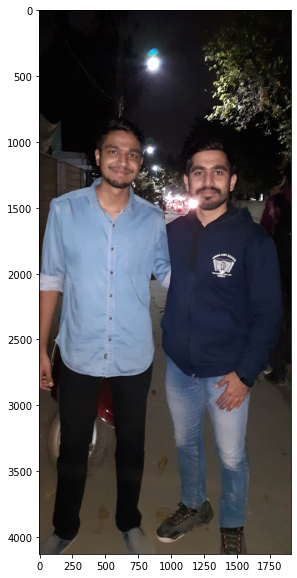

In [2]:
img = cv2.imread("./data/jpg/1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10, 10))
plt.imshow(img)

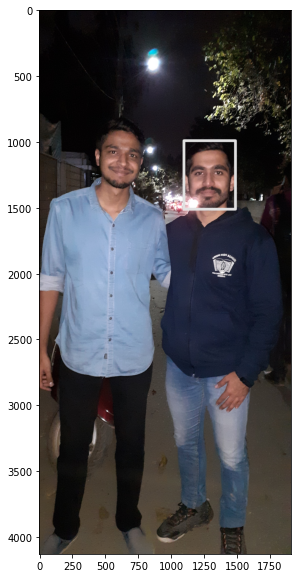

In [3]:
f = open("./data/xml/1.xml")
data_dict = xmltodict.parse(f.read())
coords = data_dict["annotation"]["object"]["polygon"]["pt"]

temp = dict(coords[0])
x1 = int(temp["x"])
y1 = int(temp["y"])
    
temp = dict(coords[2])
x2 = int(temp["x"])
y2 = int(temp["y"])

cv2.rectangle(
    img,
    pt1 = (x1, y1), 
    pt2 = (x2, y2),
    color = (225, 225, 225),
    thickness = 20
)
plt.figure(figsize=(10,10))
plt.imshow(img)

### Preprocessing

In [4]:
jpg_files = os.listdir("./data/jpg")

for i in range(len(jpg_files)):
    path_img = os.path.join("./data/jpg", str(i+1) + ".jpg")
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = cv2.copyMakeBorder(
        img, 
        0, 
        5000-img.shape[0], 
        0, 
        5000-img.shape[1], 
        cv2.BORDER_CONSTANT
    )
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    path_save = os.path.join("./data/jpg", str(i+1) + ".jpg")
    cv2.imwrite(path_save, img)

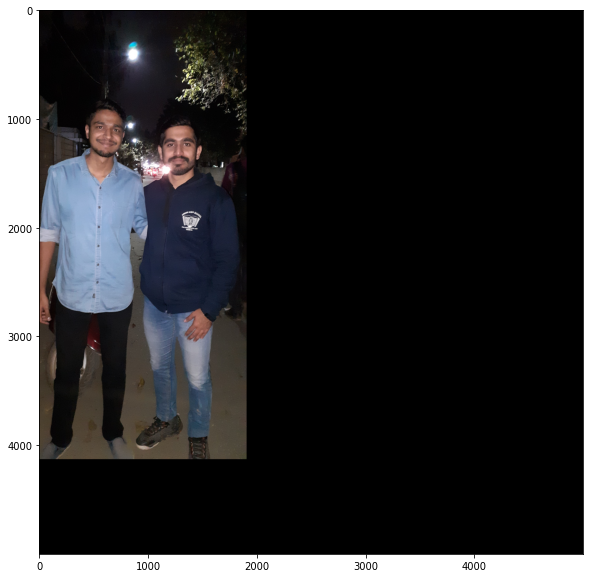

In [5]:
img = cv2.imread("./data/jpg/1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10, 10))
plt.imshow(img)

In [6]:
xml_files = os.listdir("./data/xml")
xml_content = []

for i in range(len(xml_files)):
    f = open("./data/xml/" + str(i+1) + ".xml")
    data_dict = xmltodict.parse(f.read())
    xml_content.append(data_dict)

In [7]:
xml_coords = []
for i in range(len(xml_content)):
    coords = xml_content[i]["annotation"]["object"]["polygon"]["pt"]
    
    temp = dict(coords[0])
    x1 = int(temp["x"])
    y1 = int(temp["y"])
    
    temp = dict(coords[2])
    x2 = int(temp["x"])
    y2 = int(temp["y"])
    
    x_c  = (x1 + x2)/2
    y_c  = (y1 + y2)/2
    
    h = np.abs(x1 - x2)/2
    w = np.abs(y1 - y2)/2
    
    xml_coords.append({
        "img": i + 1,
        "x_c": x_c,
        "y_c": y_c,
        "h": h,
        "w": w
    })

In [8]:
pickle.dump(xml_coords, open("xml_coords.pickle", "wb"))

In [9]:
def rectangle(coords): 
    x = coords["x_c"]
    y = coords["y_c"]
    w = coords["w"]
    h = coords["h"]
    
    x1 = int(x + h)
    x2 = int(x - h)
    y1 = int(y + w)
    y2 = int(y - w)

    return [(x1, y1), (x2, y2)]

In [10]:
def draw_rectangle(img, coords):
    coords = rectangle(coords)
    print(coords)
    
    cv2.rectangle(
        img,
        pt1 = coords[0],  
        pt2 = coords[1],
        color = (225, 225, 225),
        thickness = 20
    )
    plt.figure(figsize=(10,10))
    plt.imshow(img)

[(1487, 1511), (1097, 991)]


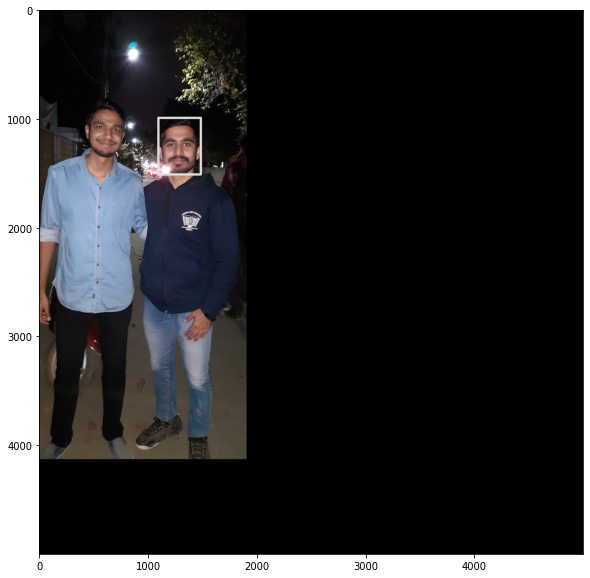

In [11]:
img = cv2.imread("./data/jpg/1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

draw_rectangle(img, xml_coords[0])